In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import requests

%matplotlib inline 
matplotlib.rcParams


API_URL = 'https://api.iextrading.com/1.0'

In [2]:
res = requests.get(f'https://api.iextrading.com/1.0/stock/TSLA/chart/5y')

In [3]:
data = res.json()
df = pd.DataFrame(data)
df.head(1)
df.tail(1)





,change,changeOverTime,changePercent,close,date,high,label,low,open,unadjustedVolume,volume,vwap
1257,-11.39,1.39504,-3.269,337.03,2018-12-18,351.55,Dec 18,333.69,350.54,7099999,7099999,343.0418


In [4]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 12 columns):
change              1258 non-null float64
changeOverTime      1258 non-null float64
changePercent       1258 non-null float64
close               1258 non-null float64
date                1258 non-null object
high                1258 non-null float64
label               1258 non-null object
low                 1258 non-null float64
open                1258 non-null float64
unadjustedVolume    1258 non-null int64
volume              1258 non-null int64
vwap                1258 non-null float64
dtypes: float64(8), int64(2), object(2)
memory usage: 118.0+ KB


In [5]:
datelist = df['date']
X_full= pd.to_datetime(datelist).astype(np.int)
y_full = df['high'].astype(np.int)
Y1_full = df['high'].astype(np.int)
Y2_full = df['low'].astype(np.int)
Y3_full = df['close'].astype(np.int)


In [6]:
# def gen_data(size):
#     X = np.random.rand(size) * 100
#     Y = X ** 2 + 7
#     Y = Y + np.random.randn(Y.shape[0]) * 300
#     return X, Y
# X_full


In [7]:
# X_full, Y1_full, Y2_full = gen_data(100)?


In [8]:
X_train, X_test, Y1_train, Y1_test = train_test_split(X_full, Y1_full, test_size=0.3)
X_train, X_test, Y2_train, Y2_test = train_test_split(X_full, Y2_full, test_size=0.3)
X_train, X_test, Y3_train, Y3_test = train_test_split(X_full, Y3_full, test_size=0.3)

In [9]:
coefs_lin = poly.polyfit(X_train, Y1_train, 1)
coefs_lin = poly.polyfit(X_train, Y1_train, 1)

## Below you will find a chart of the highs for Tesla stock between Dec 19 2013 and Dec 18 2018

Text(0.5, 1.0, 'Stock History- Tesla - Highs')

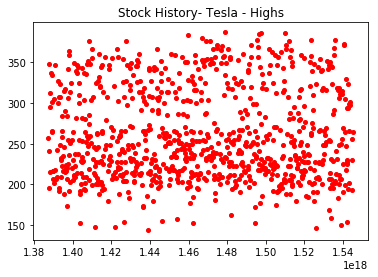

In [10]:
plt.plot(X_train, Y1_train, 'ro', markersize=4)
plt.title('Stock History- Tesla - Highs')

## Below you will find a chart of the lows for Tesla stock between Dec 19 2013 and Dec 18 2018

Text(0.5, 1.0, 'Stock History- Tesla - Lows')

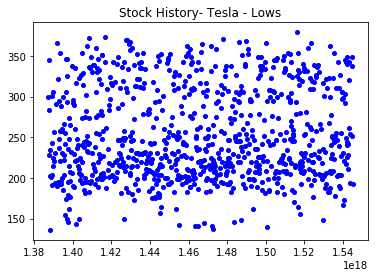

In [11]:
plt.plot(X_train, Y2_train, 'bo', markersize=4)
plt.title('Stock History- Tesla - Lows')

Text(0.5, 1.0, 'Stock History- Tesla highs and lows')

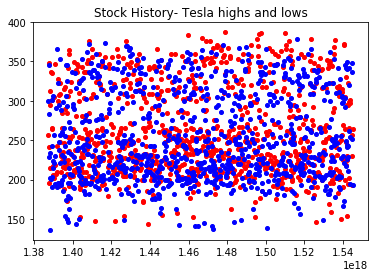

In [12]:
plt.plot(X_train, Y1_train, 'ro', markersize=4)
plt.title('Stock History- Tesla')
plt.plot(X_train, Y2_train, 'bo', markersize=4)
plt.title('Stock History- Tesla highs and lows')



Text(0.5, 1.0, 'Stock History- Tesla closing')

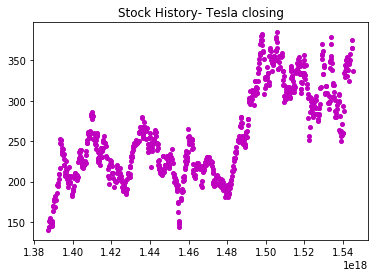

In [13]:
plt.plot(X_train, Y3_train, 'mo', markersize=4)
plt.title('Stock History- Tesla closing')

Text(0.5, 1.0, 'Stock History Test- Tesla closing')

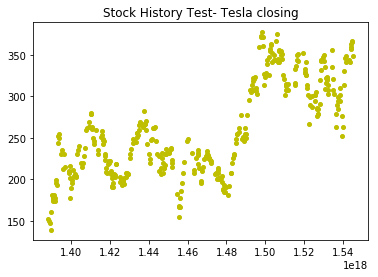

In [14]:
plt.plot(X_test, Y3_test, 'yo', markersize=4)
plt.title('Stock History Test- Tesla closing')

## This is the test group for the highs for Tesla stock between Dec 19 2013 and Dec 18 2018

Text(0.5, 1.0, 'Stock History Test- Tesla Highs')

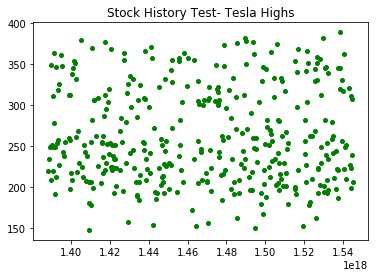

In [15]:
plt.plot(X_test, Y1_test, 'go', markersize=4)
plt.title('Stock History Test- Tesla Highs')

## This is the test group for the lows for Tesla stock between Dec 19 2013 and Dec 18 2018

Text(0.5, 1.0, 'Stock History Test- Tesla Lows')

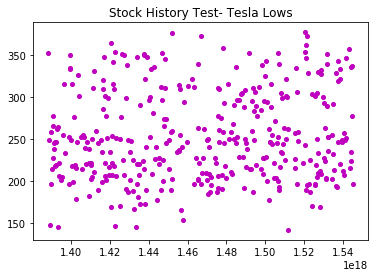

In [16]:
plt.plot(X_test, Y2_test, 'mo', markersize=4)
plt.title('Stock History Test- Tesla Lows')

In [27]:
coefs_lin = poly.polyfit(X_train, Y3_train, 1)
coefs_sq = poly.polyfit(X_train, Y3_train, 2)
coefs_ten = poly.polyfit(X_train, Y3_train, 11)

/home/mthwbrwn/.local/share/virtualenvs/data_analysis-2KCZi0-g/lib/python3.6/site-packages/ipykernel_launcher.py:3: RankWarning: The fit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
X_line = np.linspace(1387411200000000000, 1545091200000000000)
ffit_ln = poly.polyval(X_line, coefs_lin)
ffit_sq = poly.polyval(X_line, coefs_sq)
ffit_ten = poly.polyval(X_line, coefs_ten)


#### High and low were too erratic to fit any line. I decided to go with the closing value of the stock


## This is a linear regression best fit for the Tesla closing between Dec 19 2013 and Dec 18 2018

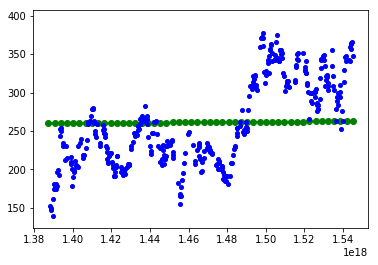

In [25]:
plt.ylim(min(Y3_train - 20), max(Y3_train +20))
plt.plot(X_line, ffit_ln, 'go--')

plt.plot(X_test, Y3_test, 'bo', markersize=4)

## Here are the same points with a squared fit 2nd degree polynomial

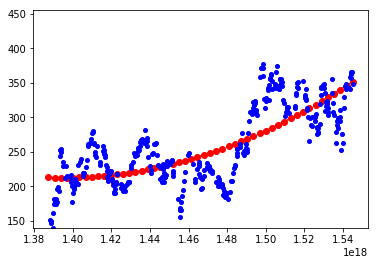

In [29]:
plt.ylim(min(Y3_train - 20), max(Y3_train +20))
# plt.plot(X_line, ffit_ln, 'go--')
plt.plot(X_line, ffit_sq, 'ro--')
# plt.plot(X_line, ffit_ten, 'co--')
plt.plot(X_test, Y3_test, 'bo', markersize=4)

## and the same points with an 11th degree polynomial

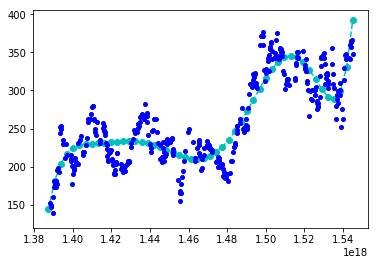

In [30]:
plt.ylim(min(Y3_train - 20), max(Y3_train +20))
# plt.plot(X_line, ffit_ln, 'go--')
# plt.plot(X_line, ffit_sq, 'ro--')
plt.plot(X_line, ffit_ten, 'co--')
plt.plot(X_test, Y3_test, 'bo', markersize=4)